# **The MA model**

## **1. Importing Stock Price data using Yahoo Finance package**

In [1]:
pip install pandas-datareader

     |████████████████████████████████| 109 kB 54 kB/s s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandas_datareader import data as pdr
import yfinance

data = pdr.get_data_yahoo('MSFT', start='2019-01-01', end='2019-12-31')
data = data['Close']

## **2. Plotting the Stock Price data** 

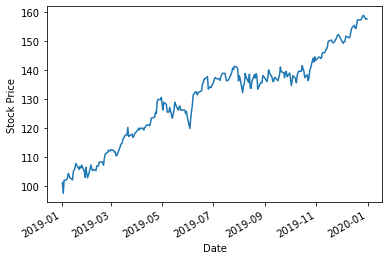

In [3]:
import matplotlib.pyplot as plt
ax = data.plot()
ax.set_ylabel("Stock Price")
plt.show()

## **3. Computing the differenced data and plotting it**

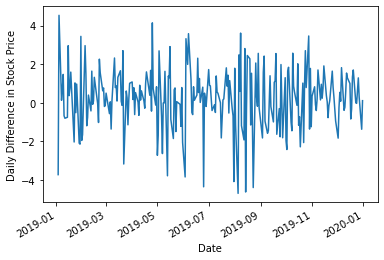

In [4]:
# Need to difference
data = data.diff().dropna()
ax = data.plot()
ax.set_ylabel("Daily Difference in Stock Price")
plt.show()

## **4. Applying an ADF test to the differenced data**

In [5]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
pvalue = result[1]
if pvalue < 0.05:
    print('stationary')
else:
    print('not stationary')

stationary


## **5. Plotting the Autocorrelation Function and the Partial Autocorrelation Function**

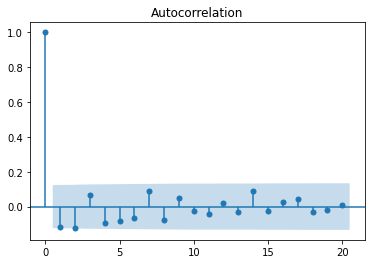

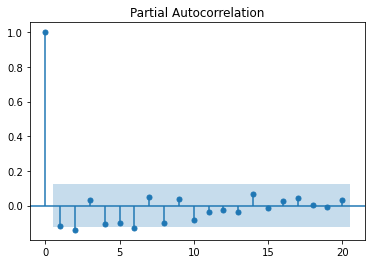

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data, lags=20)
plot_pacf(data, lags=20)
plt.show()

## **6. Fitting the MA model and plotting the forecast**

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


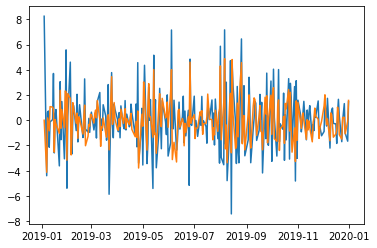

0.5149403756141663


In [7]:
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA

# Forecast the first MA(1) model
mod = ARIMA(data.diff().dropna(), order=(0,0,1))
res = mod.fit()

orig_data = data.diff().dropna()
pred = res.predict()

plt.plot(orig_data)
plt.plot(pred)
plt.show()

print(r2_score(orig_data, pred))

## **7. Fitting the MA model on train data and evaluation the R2 score on train and test data**

In [8]:
train = data.diff().dropna()[0:240]
test = data.diff().dropna()[240:250]

# Forecast the first MA(1) model
mod = ARIMA(train, order=(0,0,1))
res = mod.fit()

orig_data = data.diff().dropna()
pred = res.predict()
fcst = res.forecast(steps = len(test))

print(r2_score(train, pred))
print(r2_score(test, fcst))

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


0.5152180905737991
0.13038716291388353


/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


## **8. Plotting the out of sample forecast of the MA(1) model (MA with order 1)**

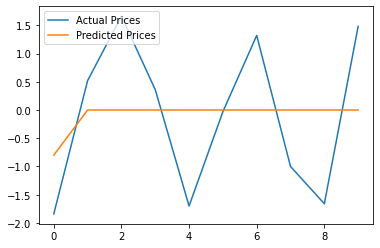

In [9]:
plt.plot(list(test))
plt.plot(list(fcst))
plt.legend(['Actual Prices', 'Predicted Prices'])
plt.show()

## **9. Estimating the error of the MA(1) model for 10 refitted one-step forecasts**

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.48335554861182495


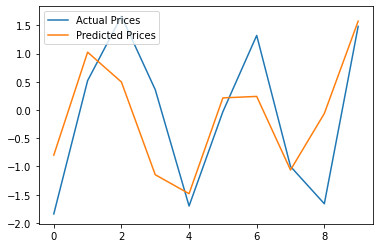

In [10]:
import pandas as pd
train = data.diff().dropna()[0:240]
test = data.diff().dropna()[240:250]

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA
fcst = []
for step in range(len(test)):
    # Forecast the first MA(1) model
    mod = ARIMA(train.reset_index(drop=True), order=(0,0,1))
    res = mod.fit()
    orig_data = data.diff().dropna()
    pred = res.predict()
    fcst += list(res.forecast(steps = 1))
    train = train.append(pd.Series(test[step]))
print(r2_score(list(test), fcst))
plt.plot(list(test))
plt.plot(fcst)
plt.legend(['Actual Prices', 'Predicted Prices'])
plt.show()

## **10. Grid search to obtain the MA order that optimizes forecasting R2**

In [11]:
def evaluate2(order):
    train = data.diff().dropna()[0:240]
    test = data.diff().dropna()[240:250]
    
    fcst = []
    for step in range(len(test)):
        # Forecast the first MA(1) model
        mod = ARIMA(train.reset_index(drop=True), order=(0,0,order))
        res = mod.fit()
        orig_data = data.diff().dropna()
        pred = res.predict()
        fcst += list(res.forecast(steps = 1))
        train = train.append(pd.Series(test[step]))

    return r2_score(list(test), fcst)

scores = []
for i in range(1, 21):
    scores.append((i, evaluate2(i)))
    
# observe best order is 4 with R2 of 0.566
scores = pd.DataFrame(scores)
print(scores[scores[1] == scores.max()[1]])

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimiz

   0         1
3  4  0.567555


## **11. Obtaining the final forecast**

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihoo

0.5675550107707281


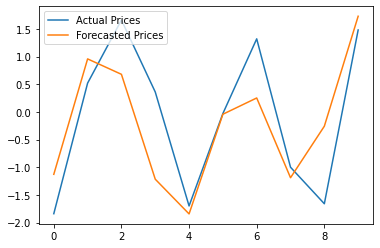

In [12]:
train = data.diff().dropna()[0:240]
test = data.diff().dropna()[240:250]

fcst = []
for step in range(len(test)):
    # Forecast the first MA(1) model
    mod = ARIMA(train.reset_index(drop=True), order=(0,0,4))
    res = mod.fit()


    orig_data = data.diff().dropna()
    pred = res.predict()

    fcst += list(res.forecast(steps = 1))

    train = train.append(pd.Series(test[step]))

print(r2_score(list(test), fcst))

plt.plot(list(test))
plt.plot(fcst)
plt.legend(['Actual Prices', 'Forecasted Prices'])
plt.show()